In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

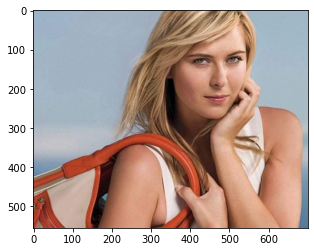

In [2]:
image = cv2.imread("C:\\Users\\VC\\Documents\\anaconda_projects\\Image_classification_project\\model\\test_images\\sharapova1.jpg")
plt.imshow(image[...,::-1])

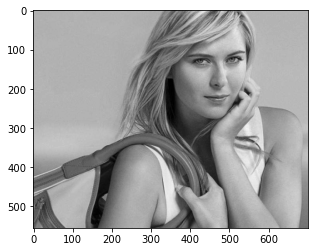

In [3]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

In [4]:
face_cascade=cv2.CascadeClassifier("C:\\Users\\VC\\Documents\\anaconda_projects\\Image_classification_project\\model\\opencv\\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("C:\\Users\\VC\\Documents\\anaconda_projects\\Image_classification_project\\model\\opencv\\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [5]:
x,y,w,h=faces[0]
x,y,w,h

(352, 38, 233, 233)

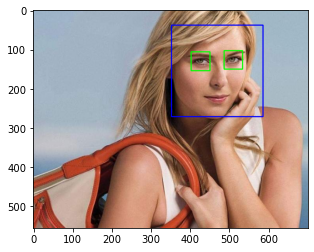

In [6]:
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+h]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(face_img[...,::-1])

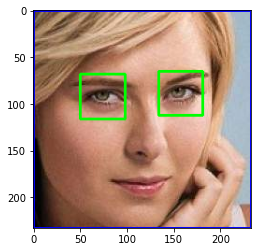

In [7]:
plt.imshow(roi_color[...,::-1])

In [8]:
cropped_img=np.array(roi_color)
cropped_img

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [9]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_color=img[y:y+h,x:x+w]
        roi_gray=gray[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

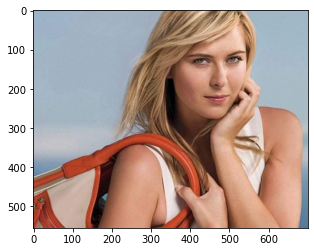

In [10]:
original_image=cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image[...,::-1])

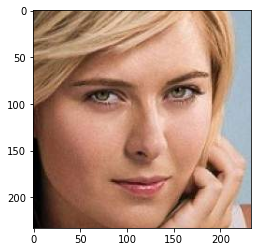

In [11]:
cropped_image= get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image[...,::-1])

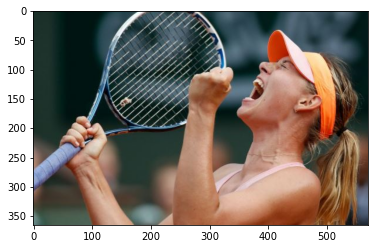

In [12]:
org_image_obstructed=cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed[...,::-1])

In [13]:
cropped_image_obstructed=get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_obstructed

In [14]:
path_to_data="./datasets/"
path_to_cr_data="./datasets/cropped/"

In [15]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./datasets/cropped',
 './datasets/lionel_messi',
 './datasets/maria_sharapova',
 './datasets/roger_federer',
 './datasets/serena_williams',
 './datasets/virat_kohli']

Creating 'Cropped' Folder

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

##### Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [18]:
cropped_image_dirs=[]
celebrity_file_names_dict= {}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1] #-1 means it will pick the last name of folder
    celebrity_file_names_dict[celebrity_name] =[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name= celebrity_name +str(count)+".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color) #storing image in cropped folder
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

Generating cropped images in folder:  ./datasets/cropped/lionel_messi
Generating cropped images in folder:  ./datasets/cropped/maria_sharapova
Generating cropped images in folder:  ./datasets/cropped/roger_federer
Generating cropped images in folder:  ./datasets/cropped/serena_williams
Generating cropped images in folder:  ./datasets/cropped/virat_kohli


In [19]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./datasets/cropped/lionel_messi\\lionel_messi1.png',
  './datasets/cropped/lionel_messi\\lionel_messi10.png',
  './datasets/cropped/lionel_messi\\lionel_messi11.png',
  './datasets/cropped/lionel_messi\\lionel_messi12.png',
  './datasets/cropped/lionel_messi\\lionel_messi13.png',
  './datasets/cropped/lionel_messi\\lionel_messi14.png',
  './datasets/cropped/lionel_messi\\lionel_messi15.png',
  './datasets/cropped/lionel_messi\\lionel_messi16.png',
  './datasets/cropped/lionel_messi\\lionel_messi17.png',
  './datasets/cropped/lionel_messi\\lionel_messi18.png',
  './datasets/cropped/lionel_messi\\lionel_messi19.png',
  './datasets/cropped/lionel_messi\\lionel_messi2.png',
  './datasets/cropped/lionel_messi\\lionel_messi20.png',
  './datasets/cropped/lionel_messi\\lionel_messi21.png',
  './datasets/cropped/lionel_messi\\lionel_messi22.png',
  './datasets/cropped/lionel_messi\\lionel_messi23.png',
  './datasets/cropped/lionel_messi\\lionel_messi24.png',
  './datasets/cro

### Use wavelet transform as a feature for traning our model

In [20]:
import pywt
def w2d(image,mode="haar",level=1):
    imArray= image
    imArray= cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    #Convert to float
    imArray= np.float32(imArray)
    imArray /= 255;
    #Compute Coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    #Reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

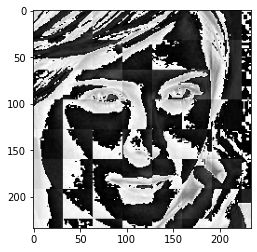

In [21]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap="gray")

#### Assigning specific numbers to celebrities

In [22]:
class_dict= {}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [23]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(image,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [24]:
len(X)

169

In [25]:
len(X[0])

4096

In [26]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(169, 4096)

### Data Cleaning Process Is Done.Now we will train our model.

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()), ('svc',SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.6976744186046512

In [29]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.82      0.90      0.86        10
           2       0.67      0.50      0.57         4
           3       0.42      0.62      0.50         8
           4       0.90      0.64      0.75        14

    accuracy                           0.70        43
   macro avg       0.70      0.68      0.68        43
weighted avg       0.74      0.70      0.71        43



##### Now we use gridsearch to try out different models. We will select those which will give best results

In [30]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
model_params ={
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest' : {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.730462,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.603692,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.730769,{'logisticregression__C': 1}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.7209302325581395

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.6046511627906976

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7674418604651163

In [40]:
best_clf=best_estimators['logistic_regression']

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[5, 0, 1, 1, 0],
       [0, 9, 0, 0, 1],
       [0, 0, 4, 0, 0],
       [0, 1, 1, 6, 0],
       [2, 0, 1, 2, 9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

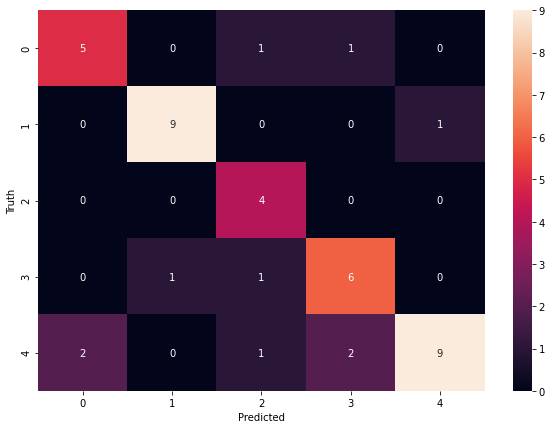

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Saved Trained Model

In [43]:
!pip install joblib
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [44]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))